In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd

# Specify the path to the CSV file
file_path = "/content/gdrive/MyDrive/Computational Physics/hist2.csv"

# Checking if our specified file exists
print(os.path.exists(file_path))

# Reading the CSV file into a DataFrame
if os.path.exists(file_path):
    housing = pd.read_csv(file_path)
    print(housing.head())  # Display the first few rows of the DataFrame
else:
    print("File does not exist.")


True
   0.0000   6
0  0.0816   4
1  0.1633   5
2  0.2449   8
3  0.3265  26
4  0.4082  28


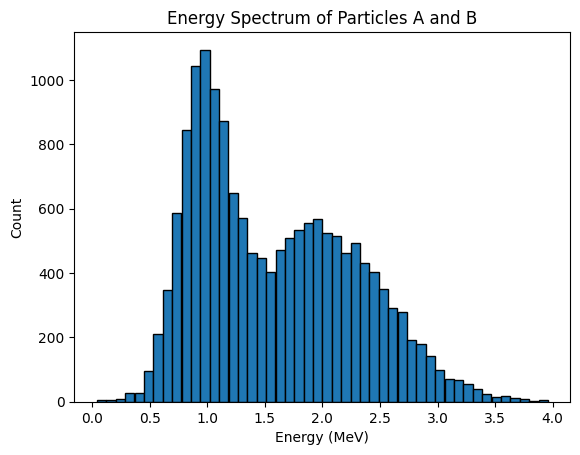

In [5]:
import matplotlib.pyplot as plt

# Reload the CSV file
data = pd.read_csv(file_path)
# Assign column names for easier access
data.columns = ['Energy', 'Count']

# Plotting the histogram as a bar chart based on the frequency data
plt.bar(data['Energy'], data['Count'], width=0.08, edgecolor='black')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Spectrum of Particles A and B')
plt.show()



Initial Guess 1:
Gaussian 1: f(x) = 952.20 * exp(-((x - 0.96)^2) / (2 * 0.21^2))
Gaussian 2: f(x) = 546.49 * exp(-((x - 1.96)^2) / (2 * 0.59^2))


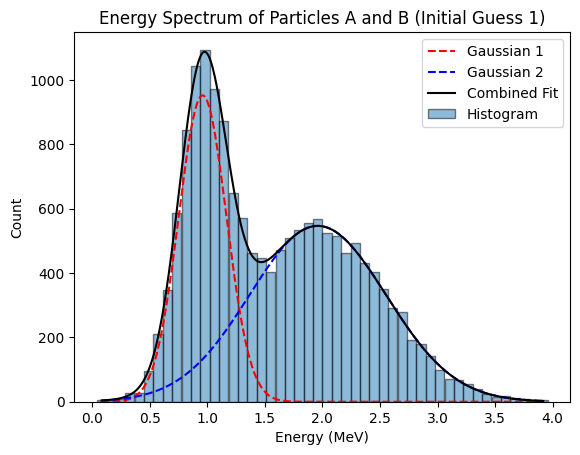

Area under Gaussian 1: 493.37
Area under Gaussian 2: 812.20
Generation ratio (Gaussian 1 / Gaussian 2): 0.61

Initial Guess 2:
Gaussian 1: f(x) = 952.20 * exp(-((x - 0.96)^2) / (2 * 0.21^2))
Gaussian 2: f(x) = 546.49 * exp(-((x - 1.96)^2) / (2 * 0.59^2))


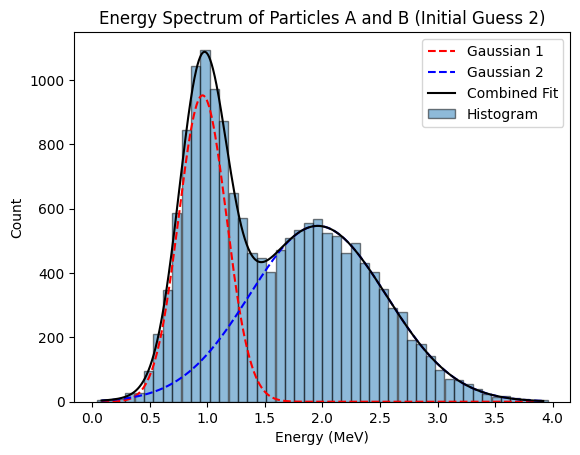

Area under Gaussian 1: 493.37
Area under Gaussian 2: 812.20
Generation ratio (Gaussian 1 / Gaussian 2): 0.61

Initial Guess 3:
Gaussian 1: f(x) = -1157.28 * exp(-((x - 0.27)^2) / (2 * 0.29^2))
Gaussian 2: f(x) = 1079.63 * exp(-((x - -0.03)^2) / (2 * 1.54^2))


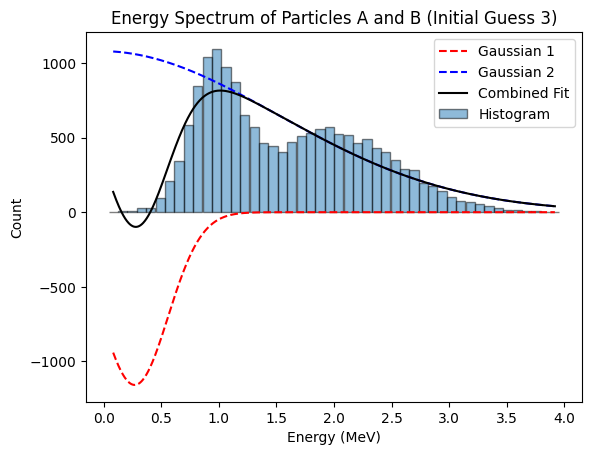

Area under Gaussian 1: -622.11
Area under Gaussian 2: 1938.16
Generation ratio (Gaussian 1 / Gaussian 2): -0.32

Initial Guess 4:
Gaussian 1: f(x) = 952.20 * exp(-((x - 0.96)^2) / (2 * 0.21^2))
Gaussian 2: f(x) = 546.49 * exp(-((x - 1.96)^2) / (2 * 0.59^2))


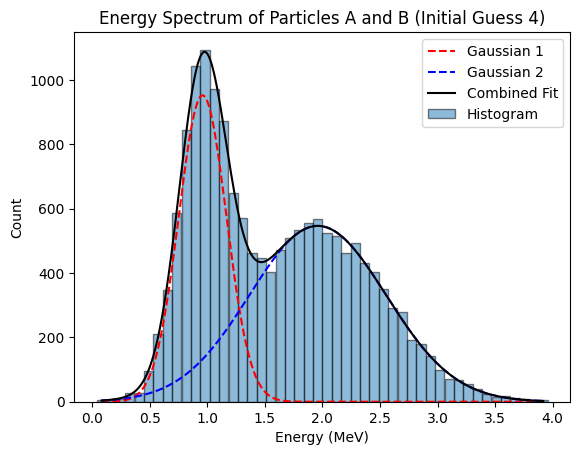

Area under Gaussian 1: 493.37
Area under Gaussian 2: 812.20
Generation ratio (Gaussian 1 / Gaussian 2): 0.61



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

# Load the CSV file
file_path = '/content/gdrive/MyDrive/Computational Physics/hist2.csv'
data = pd.read_csv(file_path)

# Assign column names for easier access
data.columns = ['Energy', 'Count']

# Define Gaussian function
def gaussian(x, amp, mean, stddev):
    return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Define a function with two Gaussians
def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    return (gaussian(x, amp1, mean1, stddev1) + gaussian(x, amp2, mean2, stddev2))

# Fit two Gaussian curves to the histogram data
x_data = data['Energy']
y_data = data['Count']

# List of initial guesses to compare
initial_guesses = [
    [1000, 1.0, 0.5, 800, 2.0, 0.5],
    [1200, 1.2, 0.4, 700, 1.8, 0.6],
    [800, 1.5, 0.6, 900, 2.5, 0.7],
    [1100, 1.0, 0.3, 750, 2.2, 0.4],
]

# Loop through each initial guess, fit the data, and plot the results
for i, initial_guess in enumerate(initial_guesses):
    # Fit the data
    params, covariance = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

    # Extract parameters for the two Gaussians
    amp1, mean1, stddev1, amp2, mean2, stddev2 = params

    # Print the equations of the Gaussian functions
    print(f"Initial Guess {i+1}:")
    print(f"Gaussian 1: f(x) = {amp1:.2f} * exp(-((x - {mean1:.2f})^2) / (2 * {stddev1:.2f}^2))")
    print(f"Gaussian 2: f(x) = {amp2:.2f} * exp(-((x - {mean2:.2f})^2) / (2 * {stddev2:.2f}^2))")

    # Plotting the histogram
    plt.bar(x_data, y_data, width=0.08, edgecolor='black', alpha=0.5, label='Histogram')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Count')
    plt.title(f'Energy Spectrum of Particles A and B (Initial Guess {i+1})')

    # Plotting the fitted Gaussians
    x_fit = np.linspace(min(x_data), max(x_data), 1000)

    # Individual Gaussian components
    gaussian1 = gaussian(x_fit, amp1, mean1, stddev1)
    gaussian2 = gaussian(x_fit, amp2, mean2, stddev2)

    plt.plot(x_fit, gaussian1, 'r--', label='Gaussian 1')
    plt.plot(x_fit, gaussian2, 'b--', label='Gaussian 2')

    # Combined Gaussian fit
    y_fit = double_gaussian(x_fit, *params)
    plt.plot(x_fit, y_fit, 'k-', label='Combined Fit')

    plt.legend()
    plt.show()

    # Integrate each Gaussian to calculate the area
    area1, _ = quad(gaussian, min(x_fit), max(x_fit), args=(amp1, mean1, stddev1))
    area2, _ = quad(gaussian, min(x_fit), max(x_fit), args=(amp2, mean2, stddev2))

    # Print the area under each Gaussian
    print(f"Area under Gaussian 1: {area1:.2f}")
    print(f"Area under Gaussian 2: {area2:.2f}")

    # Calculate and print the generation ratio
    generation_ratio = area1 / area2
    print(f"Generation ratio (Gaussian 1 / Gaussian 2): {generation_ratio:.2f}\n")
